In [352]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
#importing the training and test dataframes
train = pd.read_csv('/Users/udayshankar/Desktop/Academics/Programing/Train.csv')
test = pd.read_csv('/Users/udayshankar/Desktop/Academics/Programing/Test.csv')

In [354]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [355]:
#getting the shape of the dataframes.
print(train.shape)
print(test.shape)


(44550, 41)
(14850, 41)


In [356]:
#Evaluating the type and values columnwise:
columns = pd.DataFrame({
    "column":train.columns,
    "unique values": [len(train[i].unique()) for i in train.columns],
    "types": list(train.dtypes)
})
print(columns.to_markdown())

|    | column                |   unique values | types   |
|---:|:----------------------|----------------:|:--------|
|  0 | id                    |           44550 | int64   |
|  1 | amount_tsh            |              85 | float64 |
|  2 | date_recorded         |             346 | object  |
|  3 | funder                |            1652 | object  |
|  4 | gps_height            |            2396 | int64   |
|  5 | installer             |            1855 | object  |
|  6 | longitude             |           43155 | float64 |
|  7 | latitude              |           43155 | float64 |
|  8 | wpt_name              |           28991 | object  |
|  9 | num_private           |              59 | int64   |
| 10 | basin                 |               9 | object  |
| 11 | subvillage            |           16618 | object  |
| 12 | region                |              21 | object  |
| 13 | region_code           |              27 | int64   |
| 14 | district_code         |              20 | int64  

In [357]:
columns = pd.DataFrame({
    "column": test.columns,
    "unique values": [len(test[i].unique()) for i in test.columns],
    "types": list(test.dtypes)
})
print(columns.to_markdown())

|    | column                |   unique values | types   |
|---:|:----------------------|----------------:|:--------|
|  0 | Unnamed: 0            |           14850 | int64   |
|  1 | id                    |           14850 | int64   |
|  2 | amount_tsh            |              74 | float64 |
|  3 | date_recorded         |             326 | object  |
|  4 | funder                |             948 | object  |
|  5 | gps_height            |            2128 | int64   |
|  6 | installer             |            1085 | object  |
|  7 | longitude             |           14390 | float64 |
|  8 | latitude              |           14390 | float64 |
|  9 | wpt_name              |           10708 | object  |
| 10 | num_private           |              38 | int64   |
| 11 | basin                 |               9 | object  |
| 12 | subvillage            |            8449 | object  |
| 13 | region                |              21 | object  |
| 14 | region_code           |              26 | int64  

## Data visualization


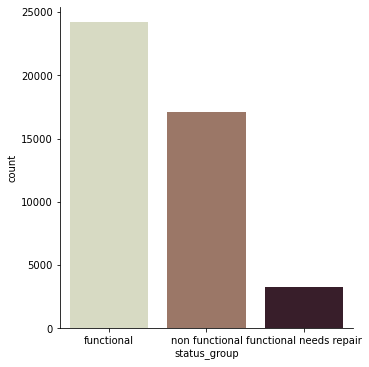

In [358]:
#training set dependent feature visualization.
sns.catplot(x="status_group", kind="count", palette="ch:.50", data = train)

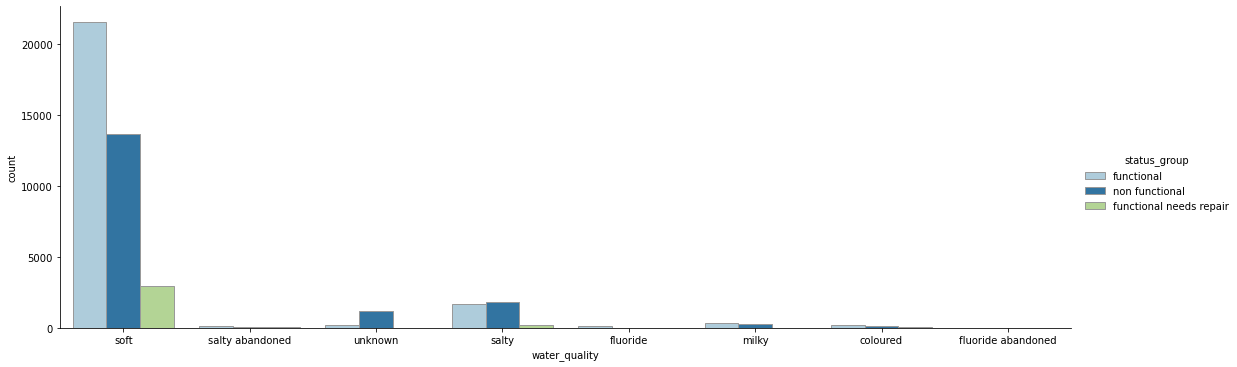

In [359]:
#water quality visualization on the basis of status group:
sns.catplot(x="water_quality", hue="status_group", kind="count",palette="Paired", edgecolor=".6",data = train,aspect=3)

From the plot we can say that, if the water quality is soft, then there is a high probability that it is in the working or functional condition.

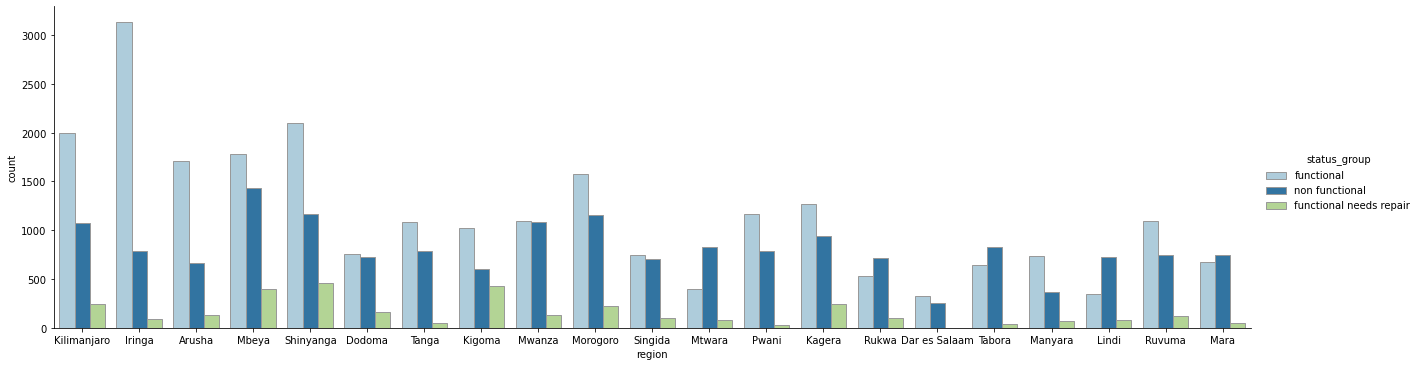

In [360]:
# reagion visualisation on the basis of status group.
sns.catplot(x="region", hue="status_group", kind="count",palette="Paired", edgecolor=".6",data=train,aspect=3.5)

From the plot we can see that, there are some regions where there is a high probability that pump is in the functional condition.

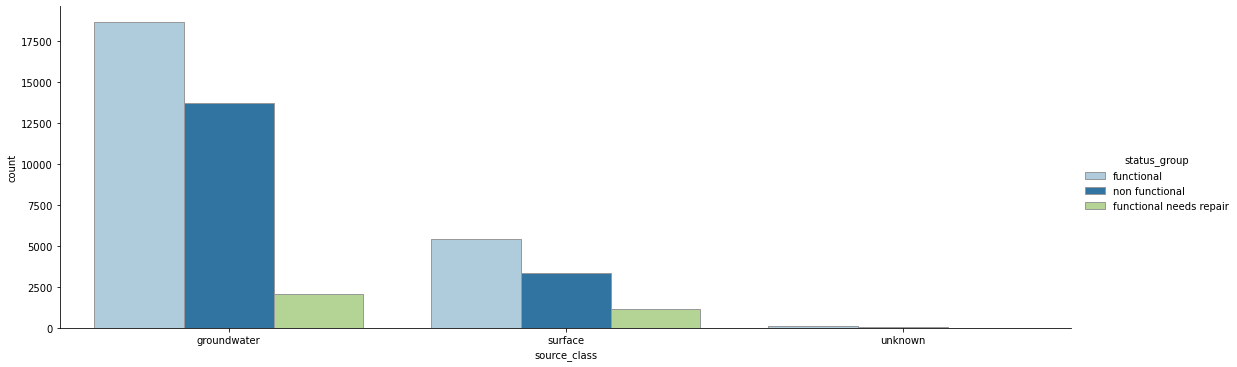

In [361]:
#Source Class visualization on the basis of status group:
sns.catplot(x="source_class", hue="status_group", kind="count",palette="Paired", edgecolor=".6",data=train,aspect=3)

From the plot we can say that, if the source class is ground water, then there is a high probability that pump is in the working or functional condition

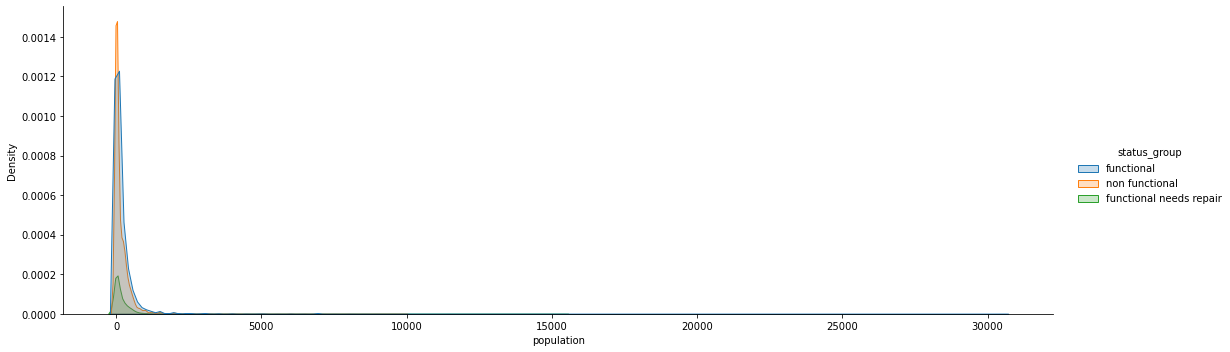

In [362]:
#population visualisation on the basis of status group
sns.displot(train, x="population", hue="status_group", kind="kde",aspect = 3,fill=True)

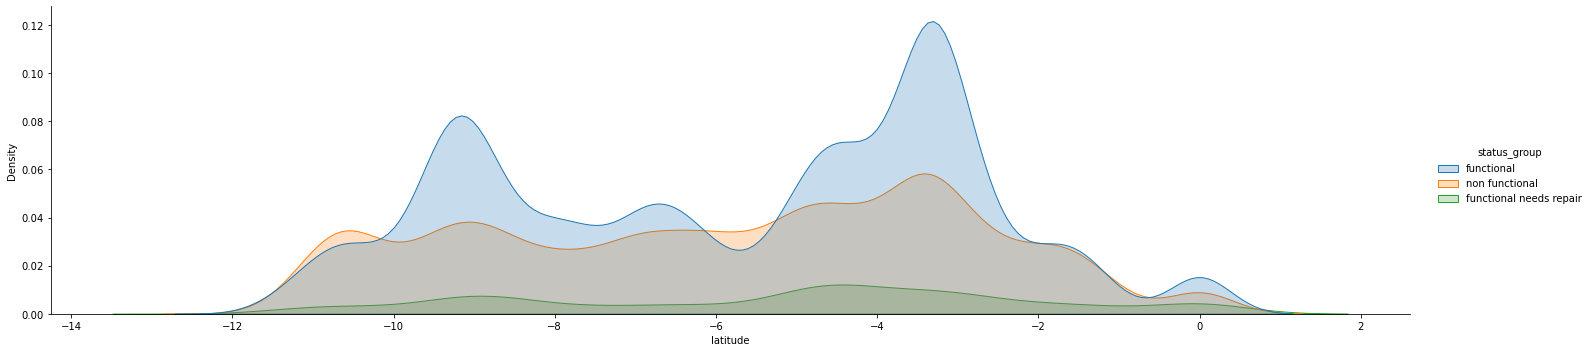

In [363]:
#latitude visualisation on the basis of status group
sns.displot(train, x="latitude", hue="status_group", kind="kde",aspect = 4,fill=True)

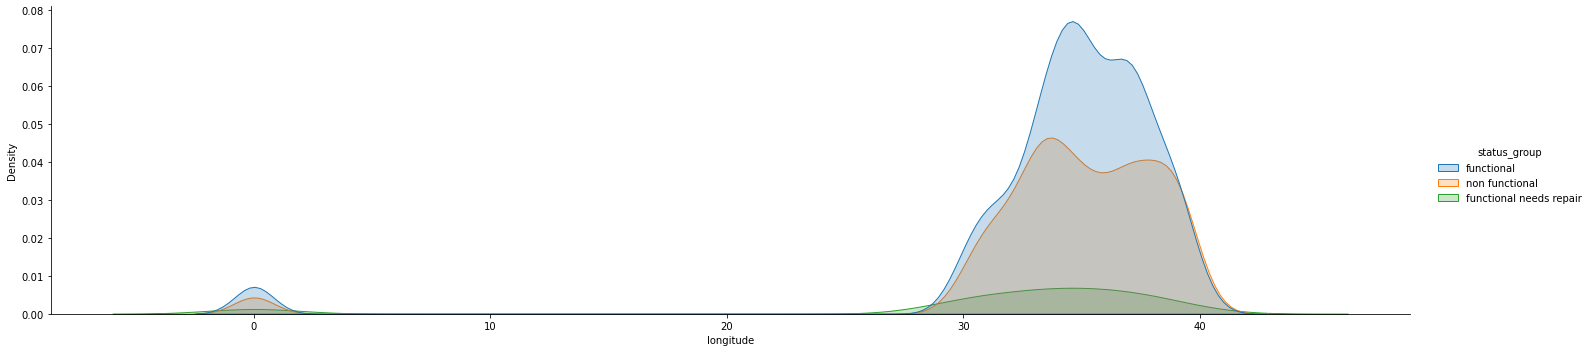

In [364]:
#longitude visualisation on the basis of status group
sns.displot(train, x="longitude", hue="status_group", kind="kde",aspect = 4,fill=True)

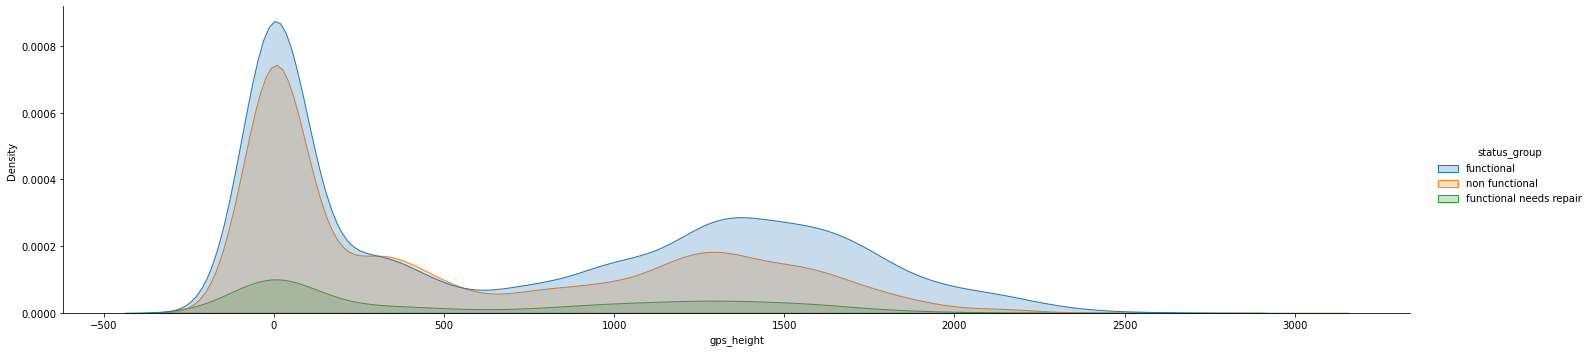

In [365]:
#gps_hight visualisation on the basis of status group
sns.displot(train, x="gps_height", hue="status_group", kind="kde",aspect=4,fill=True)

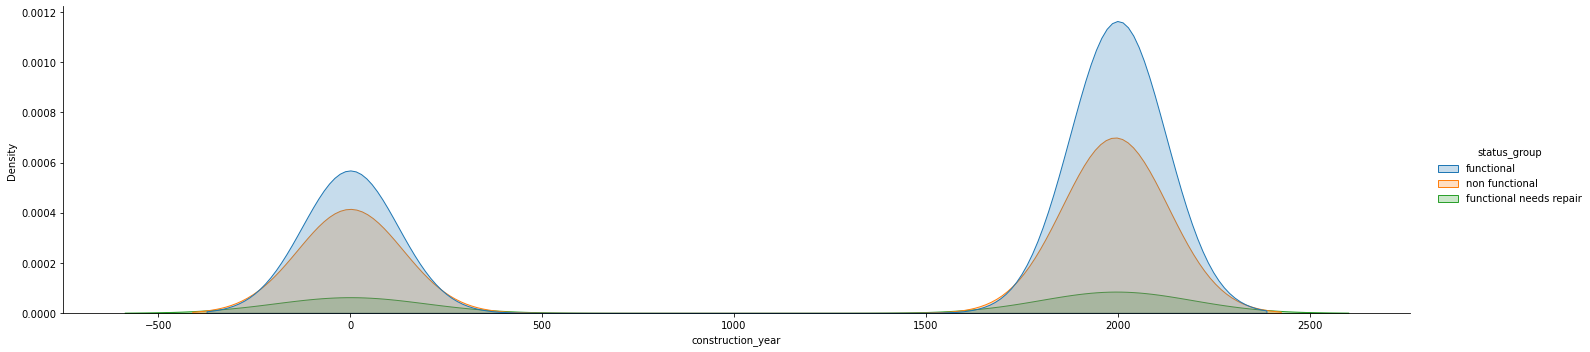

In [366]:
#construction_year visualizating construction_year on the basis of status group
sns.displot(train, x="construction_year", hue="status_group", kind="kde",aspect = 4,fill=True)

# Feature engineering-1

In [367]:
#Adding a new feature "AGE of the pump"
train['construction_year']=train['construction_year'].replace({0:1993})
train['age']=pd.DatetimeIndex(train['date_recorded']).year.astype(int)-train['construction_year']

#### finding similar feature column.

In [368]:
train.groupby(['source','source_type','source_class']).size()

source                source_type           source_class
dam                   dam                   surface           489
hand dtw              borehole              groundwater       652
lake                  river/lake            surface           544
machine dbh           borehole              groundwater      8282
other                 other                 unknown           156
rainwater harvesting  rainwater harvesting  surface          1739
river                 river/lake            surface          7135
shallow well          shallow well          groundwater     12618
spring                spring                groundwater     12889
unknown               other                 unknown            46
dtype: int64

In [369]:
train.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1339
cemo                       other motorpump        motorpump                   70
climax                     other motorpump        motorpump                   26
gravity                    gravity                gravity                  20127
india mark ii              india mark ii          handpump                  1768
india mark iii             india mark iii         handpump                    77
ksb                        submersible            submersible               1043
mono                       mono                   motorpump                 2164
nira/tanira                nira/tanira            handpump                  6130
other                      other                  other                     4768
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [370]:
train.groupby(['payment','payment_type']).size()

payment                payment_type
never pay              never pay       19002
other                  other             796
pay annually           annually         2717
pay monthly            monthly          6182
pay per bucket         per bucket       6808
pay when scheme fails  on failure       2941
unknown                unknown          6104
dtype: int64

In [371]:
train.groupby(['quantity','quantity_group']).size()

quantity      quantity_group
dry           dry                4725
enough        enough            24821
insufficient  insufficient      11367
seasonal      seasonal           3049
unknown       unknown             588
dtype: int64

In [372]:
train.groupby(['waterpoint_type','waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough               90
communal standpipe           communal standpipe       21452
communal standpipe multiple  communal standpipe        4558
dam                          dam                          5
hand pump                    hand pump                13116
improved spring              improved spring            590
other                        other                     4739
dtype: int64

Since,there is a similarity between features, so we can keep one feature and drop rest of the features as dropping similar features would not affect our model.       

### Droping similar feature column.

In [373]:
train = train.drop(['id','date_recorded'],1)


In [374]:
train = train.drop(['source_type','source','extraction_type_group','extraction_type_class','payment_type','quantity_group','waterpoint_type_group'],1)


In [375]:
train = train.drop(['public_meeting','permit','ward','subvillage','recorded_by','district_code','num_private','wpt_name','scheme_name','construction_year','management_group'],1)

In [376]:
print(train.shape)


(44550, 22)


In [377]:
#finding total Null values in the traing set coulmnwise.
total_null_values = train.isnull().sum().sort_values(ascending=False)
percent_null_values=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
totaltrain=pd.concat([total_null_values,percent_null_values],1,keys=['Null Values','% Null Values'])
totaltrain

,Null Values,% Null Values
scheme_management,2832,0.063569
installer,2807,0.063008
funder,2793,0.062694
extraction_type,0,0.000000
status_group,0,0.000000
waterpoint_type,0,0.000000
source_class,0,0.000000
quantity,0,0.000000
quality_group,0,0.000000
water_quality,0,0.000000


In [378]:
#filling null_values with mode as data_type of the columns categorical
for column in ['scheme_management', 'installer', 'funder']:
    train[column].fillna(train[column].mode()[0], inplace=True)

In [379]:
#handling low frequency levels in 'funder' and 'installer'
#converting those that occur 100 times or less and set to 'other'
low_freq=['funder','installer']
train = train.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'other') if x.name in low_freq else x)

In [380]:
#encoding categorical variable
column=['installer','funder','basin','region','lga','scheme_management','extraction_type','management','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']
for col in column:
    train[col]=pd.factorize(train[col])[0]
for col in column:
    test[col]=pd.factorize(test[col])[0]

In [381]:
#findin maximum and minimum values of each feature columns in training set
for col in train.columns.values: 
    unique_entries = pd.unique(train[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}") 

The column 'amount_tsh' has range 0.0 to 170000.0
The column 'funder' has range 0 to 66
The column 'gps_height' has range -90 to 2770
The column 'installer' has range 0 to 61
The column 'longitude' has range 0.0 to 40.34519307
The column 'latitude' has range -11.64837759 to -2e-08
The column 'basin' has range 0 to 8
The column 'region' has range 0 to 20
The column 'region_code' has range 1 to 99
The column 'lga' has range 0 to 124
The column 'population' has range 0 to 30500
The column 'scheme_management' has range 0 to 11
The column 'extraction_type' has range 0 to 17
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'water_quality' has range 0 to 7
The column 'quality_group' has range 0 to 5
The column 'quantity' has range 0 to 4
The column 'source_class' has range 0 to 2
The column 'waterpoint_type' has range 0 to 6
The column 'status_group' has range functional to non functional
The column 'age' has range -7 to 53


In [382]:
train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,lga,...,extraction_type,management,payment,water_quality,quality_group,quantity,source_class,waterpoint_type,status_group,age
0,7.0,0,1203,0,37.228664,-3.256505,0,0,3,0,...,0,0,0,0,0,0,0,0,functional,5
1,0.0,1,1409,1,34.615481,-9.972601,1,1,11,1,...,0,1,1,0,0,0,0,0,functional,27
2,0.0,2,1572,2,36.658778,-3.321529,0,2,2,2,...,0,2,1,0,0,1,0,0,non functional,11
3,0.0,3,0,3,33.628025,-8.860795,2,3,12,3,...,0,3,2,0,0,1,1,0,functional,18
4,300.0,3,1283,3,37.655509,-3.669777,0,0,3,4,...,0,2,3,0,0,1,0,0,functional,6


### here we are done with our data preprocessing of the traing set.

# Spliting the training set

In [383]:
x_train = train.drop(['status_group'],1)
y_train = train['status_group']

print(y_train.value_counts())

y_train = y_train.map({'functional':1,'non functional':2,'functional needs repair':3})
print(y_train.value_counts())

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64
1    24194
2    17118
3     3238
Name: status_group, dtype: int64


# Hyperparameter tuning and model building

In [384]:
#spliting the given training set into train and test set for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state = 0)

### Hyperparameter tuning for RandomForestClassifier

In [385]:
from sklearn.ensemble import RandomForestClassifier
classifier_r= RandomForestClassifier(random_state=0)
classifier_r.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [386]:
n_estimators=[8,12,15]
max_features=['auto', 'log2']
max_depth=[8,10,20]
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
hyperparameter={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search = GridSearchCV(estimator=classifier_r,param_grid=hyperparameter,cv=5,n_jobs=6,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.25 %
Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 15}


In [387]:
#cross validation using splitted Test set
from sklearn.model_selection import cross_val_score
classifier_r=RandomForestClassifier(max_depth=20, max_features='auto', n_estimators= 20)
classifier_r.fit(X_train,y_train)
score=cross_val_score(classifier_r,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_r.score(X_test,y_test)*100)

CV_score: 79.25645342312009
Test_Accurarcy: 78.45117845117845


#### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [388]:
from sklearn.feature_selection import RFECV
selector=RFECV(classifier_r,min_features_to_select=1)
selector=selector.fit(X_train,y_train)
print(selector.n_features_)
print(selector.ranking_)

21
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [389]:
rank=selector.ranking_
dict1=dict(enumerate(X_train.columns))
for i in range(len(rank)):
    if rank[i]==1:
        print("Important feature : {}".format(dict1[i]))
for i in range(len(rank)):
    if rank[i]!=1:        
        print("Redundant Feature : {}".format(dict1[i]))     

Important feature : amount_tsh
Important feature : funder
Important feature : gps_height
Important feature : installer
Important feature : longitude
Important feature : latitude
Important feature : basin
Important feature : region
Important feature : region_code
Important feature : lga
Important feature : population
Important feature : scheme_management
Important feature : extraction_type
Important feature : management
Important feature : payment
Important feature : water_quality
Important feature : quality_group
Important feature : quantity
Important feature : source_class
Important feature : waterpoint_type
Important feature : age


##### Redundant features will be eliminated in the second round of feature selection as they have low importance or ranking

### Hyperparameter tuning for DecisionTreeClassifier

In [390]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Hyperparameter tuning for ExtraTreesClassifier

In [391]:
from sklearn.ensemble import ExtraTreesClassifier
classifier_extra=ExtraTreesClassifier(random_state=49)
classifier_extra.fit(X_train,y_train)

ExtraTreesClassifier(random_state=49)

In [392]:
n_estimators=[8,12,18]
max_depth = [8, 10, 20]
criterion= ['entropy','gini']
hyperparameter={'n_estimators':n_estimators,'max_depth':max_depth,'criterion':criterion}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_extra,param_grid=hyperparameter,cv=5,n_jobs=4,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.01 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 18}


In [393]:
#cross validation using Test set
from sklearn.model_selection import cross_val_score
classifier_extra=ExtraTreesClassifier(max_depth=20,criterion='gini',n_estimators= 20)
classifier_extra.fit(X_train,y_train)
score=cross_val_score(classifier_extra,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_extra.score(X_test,y_test)*100)

CV_score: 78.83838383838383
Test_Accurarcy: 78.28282828282829


# Feature engineering-2

### For better accuracy:-
#### 1)We will remove the useless features on the basis of recursive feature elimination and cross-validation ranking.
#### 2)We have changed latitute and longitute columns by x, y and z coordinates for the better represented of the locations.
#### 3)We have standardized: amount_tsh, gps_height and population columns just to avoid over-training of the model on one feature over another.

In [394]:
train = train.drop(['basin','region_code','scheme_management','water_quality','quality_group','source_class'],1)

In [395]:
train['x_cord']=np.cos(train["longitude"].astype(np.float64))*np.cos(train["latitude"].astype(np.float64))
train['y_cord']=np.sin(train["longitude"].astype(np.float64))*np.cos(train["latitude"].astype(np.float64))
train['z_cord']=np.sin(train["latitude"].astype(np.float64))

In [396]:
train = train.drop(['longitude','latitude'],1)

In [397]:
train.head()

,amount_tsh,funder,gps_height,installer,region,lga,population,extraction_type,management,payment,quantity,waterpoint_type,status_group,age,x_cord,y_cord,z_cord
0,7.0,0,1203,0,0,0,90,0,0,0,0,0,functional,5,-0.885487,0.450296,0.114659
1,0.0,1,1409,1,1,1,70,0,1,1,0,0,functional,27,0.852227,0.049452,0.520830
2,0.0,2,1572,2,2,2,150,0,2,1,1,0,non functional,11,-0.497764,0.848647,0.178967
3,0.0,3,0,3,3,3,0,0,3,2,1,0,functional,18,0.505592,-0.677220,-0.534556
4,300.0,3,1283,3,0,4,34,0,2,3,1,0,functional,6,-0.862903,0.037649,0.503966


In [398]:
train.shape

(44550, 17)

In [399]:
# finding max and min values of each feature columns in training set
for col in train.columns.values: 
    unique_entries = pd.unique(train[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}")
 

The column 'amount_tsh' has range 0.0 to 170000.0
The column 'funder' has range 0 to 66
The column 'gps_height' has range -90 to 2770
The column 'installer' has range 0 to 61
The column 'region' has range 0 to 20
The column 'lga' has range 0 to 124
The column 'population' has range 0 to 30500
The column 'extraction_type' has range 0 to 17
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'quantity' has range 0 to 4
The column 'waterpoint_type' has range 0 to 6
The column 'status_group' has range functional to non functional
The column 'age' has range -7 to 53
The column 'x_cord' has range -0.999815609347757 to 0.9999999999999998
The column 'y_cord' has range -0.9999799236831607 to 0.9954478584746386
The column 'z_cord' has range -0.9999999997444838 to 0.9999999999951028


# Spliting the training set

In [400]:
x_train = train.drop(['status_group'],1)
y_train = train['status_group']

In [401]:
#encoding dependent feature coulumns
print(y_train.value_counts())
#converting each unquie value of dependent feature into a numeric value
y_train=y_train.map({'functional':1,'non functional':2,'functional needs repair':3})
print(y_train.value_counts())

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64
1    24194
2    17118
3     3238
Name: status_group, dtype: int64


## Hyperparameter tuning and model building

In [402]:
#further spliting the training set into train and test set for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state = 0)

### Hyperparameter tuning for RandomForestClassifier

In [403]:
from sklearn.ensemble import RandomForestClassifier
classifier_r= RandomForestClassifier(random_state=0)
classifier_r.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [404]:
n_estimators=[8,12,15]
max_features=['auto', 'log2']
max_depth=[8,10,20]
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
hyperparameter={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search = GridSearchCV(estimator=classifier_r,param_grid=hyperparameter,cv=5,n_jobs=6,scoring = 'accuracy')
grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.05 %
Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 15}


In [405]:
#cross validation using splitted Test set
from sklearn.model_selection import cross_val_score
classifier_r=RandomForestClassifier(max_depth=20, max_features='auto', n_estimators= 20)
classifier_r.fit(X_train,y_train)
score=cross_val_score(classifier_r,X_train,y_train,cv=5)
print("CV_score:",np.mean(score)*100)
print("Test_Accurarcy:",classifier_r.score(X_test,y_test)*100)

CV_score: 79.2480359147026
Test_Accurarcy: 78.13692480359147


## Visualization using T-sne

/Users/udayshankar/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


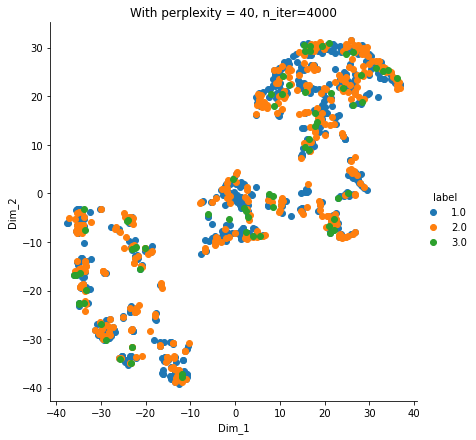

In [406]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=40,  n_iter=4000)
tsne_data = model.fit_transform(x_train[:1000])
# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train[:1000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 40, n_iter=4000')
plt.show()

## Feature engineering on Test data  

In [407]:
#Adding a new column "AGE of the pump"
test['construction_year'] = test['construction_year'].replace({0:1993})
test['age'] = pd.DatetimeIndex(test['date_recorded']).year.astype(int)-test['construction_year']

In [408]:
#dropping id and data_recorded column
test = test.drop(['id','date_recorded','Unnamed: 0'],1)

In [409]:
#dropping public meeting, permit features,ward etc. which will not affect our model.
test = test.drop(['source_type','source','extraction_type_group','extraction_type_class','payment_type','quantity_group','waterpoint_type_group'],1)

In [410]:
#dropping public meeting, permit features,ward etc. which will not affect our model.
test = test.drop(['public_meeting','permit','ward','subvillage','recorded_by','district_code','num_private','wpt_name','scheme_name','construction_year','management_group'],1)

In [411]:
#handling missing values of test set
total_null_values = test.isnull().sum().sort_values(ascending=False)
percent_null_values=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
total_test=pd.concat([total_null_values,percent_null_values],1,keys=['Null Values','% Null Values'])
total_test

,Null Values,% Null Values
amount_tsh,0,0.0
scheme_management,0,0.0
waterpoint_type,0,0.0
source_class,0,0.0
quantity,0,0.0
quality_group,0,0.0
water_quality,0,0.0
payment,0,0.0
management,0,0.0
extraction_type,0,0.0


In [412]:
#filling Null values with mode as data_type is categorical
for column in ['scheme_management', 'installer', 'funder']:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [413]:
#handling low frequency levels in 'funder' and 'installer'
#converting those that occur 100 times or less and set to 'other'
low_freq=['funder','installer']
test = test.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'other') if x.name in low_freq else x)

In [414]:
#encoding categorical variable
column = ['installer','funder','basin','region','lga','scheme_management','extraction_type','management','payment','water_quality','quality_group','quantity','source_class','waterpoint_type']
for col in column:
    test[col]=pd.factorize(test[col])[0]  

In [415]:
#Elimination redundant features
test = test.drop(['basin','region_code','scheme_management','water_quality','quality_group','source_class'],1)

In [416]:
#Lat,long coordinates have a problem that they are 2 features that represent a three dimensional space.
#Mapping lat,long coordinates into x , y and z coordinates.
test['x_cord']=np.cos(test["longitude"].astype(np.float64))*np.cos(test["latitude"].astype(np.float64))
test['y_cord']=np.sin(test["longitude"].astype(np.float64))*np.cos(test["latitude"].astype(np.float64))
test['z_cord']=np.sin(test["latitude"].astype(np.float64))

In [417]:
#dropping latitude and longitute column
test = test.drop(['longitude','latitude'],1)

In [418]:
#standardizing 'amount_tsh','gps_height'and 'population' columns in test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_col=['amount_tsh','gps_height','population']
features = test[std_col]
scaler= sc.fit_transform(features.values)
test[std_col] = scaler

In [419]:
#max and min values of each feature columns in test set 
for col in test.columns.values: 
    unique_entries = pd.unique(test[col])
    print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}")   

The column 'amount_tsh' has range -0.08058319676048512 to 81.02822988318516
The column 'funder' has range 0 to 25
The column 'gps_height' has range -1.0698280723958797 to 2.8018298328777003
The column 'installer' has range 0 to 19
The column 'region' has range 0 to 20
The column 'lga' has range 0 to 123
The column 'population' has range -0.4067611579933158 to 21.905767732589283
The column 'extraction_type' has range 0 to 16
The column 'management' has range 0 to 11
The column 'payment' has range 0 to 6
The column 'quantity' has range 0 to 4
The column 'waterpoint_type' has range 0 to 6
The column 'age' has range -5 to 53
The column 'x_cord' has range -0.9993762187149792 to 0.9999999999999998
The column 'y_cord' has range -0.9997229516192775 to 0.9822582909639378
The column 'z_cord' has range -0.9999999997190122 to 0.9999999893258777


In [420]:
test.shape

(14850, 16)

In [421]:
test.head()

,amount_tsh,funder,gps_height,installer,region,lga,population,extraction_type,management,payment,quantity,waterpoint_type,age,x_cord,y_cord,z_cord
0,-0.080583,0,1.445231,0,0,0,1.309072,0,0,0,0,0,7,0.197759,0.163141,-0.966580
1,-0.080583,0,-0.978713,1,1,1,-0.406761,1,0,0,1,0,18,0.017021,-0.484441,0.874659
2,-0.080583,1,-0.978713,2,1,2,-0.406761,2,0,0,1,1,18,0.122979,-0.513598,-0.849172
3,-0.080583,0,-0.978713,0,2,3,-0.406761,3,0,0,1,1,18,-0.559807,-0.045099,-0.827395
4,-0.080583,2,-0.978713,0,2,4,-0.406761,0,0,0,2,0,18,0.291332,0.132899,-0.947345


### Comments:-
1)Out of the above three models, we have selected RandomForestClassifier as it is giving highest accuracy.

2)Now, we will do final prediction on Test.csv data,using RandomForest classifier. 

### Prediction on Test data

In [424]:
testGet = test.copy()

In [425]:
test_data = classifier_r.predict(testGet)
test_data = pd.DataFrame(test_data,columns=['status_group'])
test_data['status_group']=test_data['status_group'].map({1:'functional',2:'non functional',3:'functional needs repair'})
test_data.to_csv('203110059_assignment2.csv',header=False,index=False)

### References:
1. https://scikit-learn.org/stable/index.html
2. https://stackoverflow.com
3. https://www.datacamp.com/community/blog/python-pandas-cheat-sheet?